In [1]:
# imports - standard
import numpy as np
import pandas as pd

# imports - custom
import sys
sys.path.append("../code")
from hierarchical_rm_permanova import hierarchical_rm_permanova as hrm

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# create example dataframe of random hierarchical data
 
# settings
n_conditions = 4
n_clusters = 10
n_instances = 10

# simulate data 
rng = np.random.default_rng(0)
data_0 = rng.normal(0, 1, n_clusters * n_instances)
data_1 = rng.normal(0, 1, n_clusters * n_instances)
data_2 = rng.normal(0, 1, n_clusters * n_instances)
data_3 = rng.normal(0, 1, n_clusters * n_instances)

# create dataframe
data = np.concatenate([data_0, data_1, data_2, data_3])
condition = np.repeat(np.arange(n_conditions), n_clusters*n_instances)
cluster = np.tile(np.repeat(np.arange(n_clusters), n_instances), n_conditions)
instance = np.tile(np.tile(np.arange(n_instances), n_clusters), n_conditions)
df = pd.DataFrame({"value": data, "condition": condition, "cluster": cluster, "instance": instance})
df


,value,condition,cluster,instance
0,0.125730,0,0,0
1,-0.132105,0,0,1
2,0.640423,0,0,2
3,0.104900,0,0,3
4,-0.535669,0,0,4
...,...,...,...,...
395,0.089056,3,9,5
396,1.594157,3,9,6
397,-1.095472,3,9,7
398,0.362502,3,9,8


p-value: 0.500
True F-statistic: 399.26


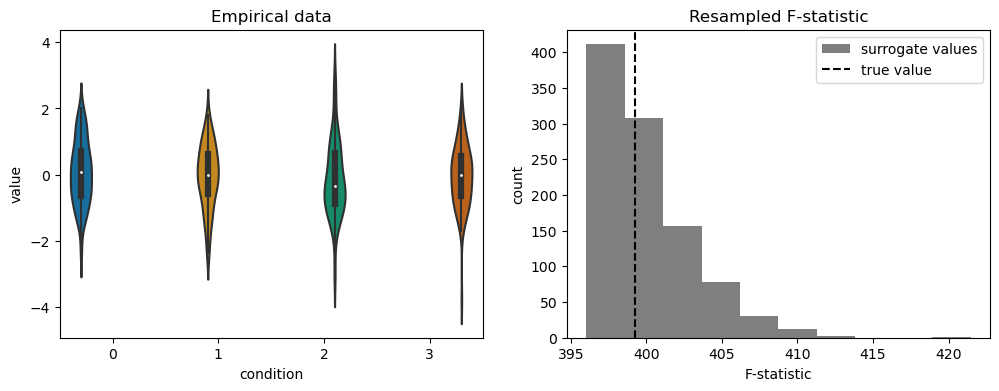

In [3]:
# apply hierarchical repeated measures analysis of variance
res = hrm(df, 'value', 'condition', 'cluster', 'instance')

p-value: <0.001
True F-statistic: 436.94


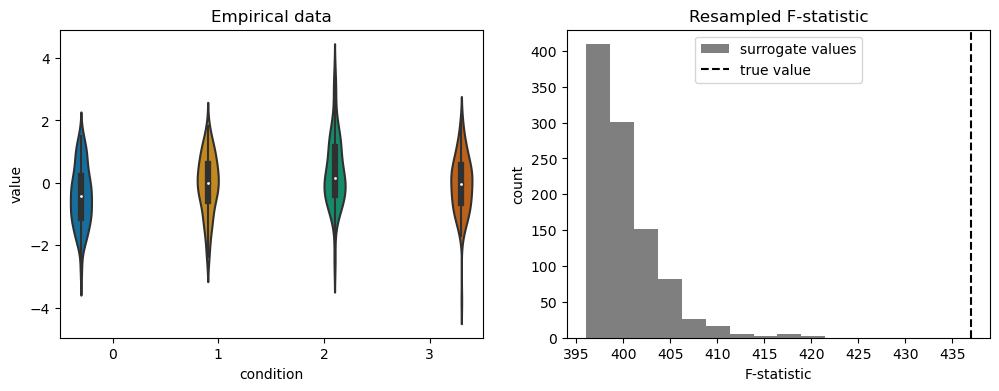

In [4]:
# show example with true group difference
 
# settings
n_conditions = 4
n_clusters = 10
n_instances = 10

# simulate data 
rng = np.random.default_rng(0)
data_0 = rng.normal(-0.5, 1, n_clusters * n_instances)
data_1 = rng.normal(0, 1, n_clusters * n_instances)
data_2 = rng.normal(0.5, 1, n_clusters * n_instances)
data_3 = rng.normal(0, 1, n_clusters * n_instances)

# create dataframe
data = np.concatenate([data_0, data_1, data_2, data_3])
condition = np.repeat(np.arange(n_conditions), n_clusters*n_instances)
cluster = np.tile(np.repeat(np.arange(n_clusters), n_instances), n_conditions)
instance = np.tile(np.tile(np.arange(n_instances), n_clusters), n_conditions)
df = pd.DataFrame({"value": data, "condition": condition, "cluster": cluster, "instance": instance})

# apply hierarchical repeated measures analysis of variance
res = hrm(df, 'value', 'condition', 'cluster', 'instance')